In [4]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm

X, y = datasets.load_iris(return_X_y=True)
X.shape, y.shape
((150, 4), (150,))

((150, 4), (150,))

In [5]:
>>> X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.4, random_state=0)

>>> X_train.shape, y_train.shape
((90, 4), (90,))
>>> X_test.shape, y_test.shape
((60, 4), (60,))

>>> clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
>>> clf.score(X_test, y_test)

0.9666666666666667

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score


def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)

n_samples = 30
degrees = [1, 4, 15]

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))
plt.show()

<Figure size 1400x500 with 3 Axes>

In [7]:
import numpy as np
import pandas as pd
import random
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn import datasets
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel


#load in datasets
ozone = pd.read_csv('ozone.csv', encoding = 'unicode_escape')
steelplates = pd.read_csv('steelplates.csv', encoding = 'unicode_escape')

#create lists for x and y values for training and testing data for differnt machine learning algorithms
ozone_mlp_train = []
ozone_mlp_test=[]
X_Axis=[]

steelplates_mlp_train = []
steelplates_mlp_test=[]


ozone_tree_train = []
ozone_tree_test=[]


steelplates_tree_train = []
steelplates_tree_test=[]


ozone_mlp_train_feature = []
ozone_mlp_test_feature=[]


#specify different ML algorithms
clf_mlp = MLPClassifier(activation="logistic", solver="adam", alpha=1e-5, hidden_layer_sizes=(15,10), random_state=1,max_iter=1000,learning_rate_init=.1,verbose=False)
clf_tree = DecisionTreeClassifier(criterion = 'entropy', random_state=0, max_depth=3)
clf = ExtraTreesClassifier(n_estimators=50)

#Create AUC for different datasets and ml algorithms
def edges_index(dataset, y1, y2, mlAlgo):
    frac=.1
    clf_mlp = MLPClassifier(activation="logistic", solver="adam", alpha=1e-5, hidden_layer_sizes=(15,10), random_state=1,max_iter=1000,learning_rate_init=.1,verbose=False)
    clf_tree = DecisionTreeClassifier(criterion = 'entropy', random_state=0, max_depth=3)
    
    for i in range(9):
        new_dataset = dataset.sample(n=round(frac*len(dataset)), random_state=1)
        y = new_dataset['Class']
        if len(dataset.columns) == len(steelplates.columns):
            X = new_dataset.iloc[:, : 28]
        else:
            X = new_dataset.iloc[:,:-1]
            
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9,test_size=0.1, random_state=1)
        mlAlgo = mlAlgo.fit(X_train, y_train)
        y_pred =  mlAlgo.predict(X_test)
        y1.append(accuracy_score(y_true=y_train, y_pred=mlAlgo.predict(X_train)))
        y2.append(accuracy_score(y_true=y_test, y_pred=y_pred))
        if len(X_Axis)<9:
            X_Axis.append("{:.0%}".format(round(frac,2)))
        frac = frac+.1
        
        

edges_index(ozone, ozone_mlp_train, ozone_mlp_test, clf_mlp)
edges_index(steelplates, steelplates_mlp_train, steelplates_mlp_test, clf_mlp)
edges_index(ozone, ozone_tree_train, ozone_tree_test, clf_tree)
edges_index(steelplates, steelplates_tree_train, steelplates_tree_test, clf_tree)
        
        


#same thing as above but with feature selection of extra trees classifier        
        
ozone_mlp_train_x_trees = []
ozone_mlp_test_x_trees=[]

steelplates_mlp_train_x_trees = []
steelplates_mlp_test_x_trees= []


ozone_tree_train_x_trees = []
ozone_tree_test_x_trees =[]


steelplates_tree_train_x_trees = []
steelplates_tree_test_x_trees= []


ozone_mlp_train_feature_x_trees = []
ozone_mlp_test_feature_x_trees =[]


        
def edges_index_x_trees(dataset, y1, y2, mlAlgo):
    frac=.1 
    clf_mlp = MLPClassifier(activation="logistic", solver="adam", alpha=1e-5, hidden_layer_sizes=(15,10), random_state=1,max_iter=1000,learning_rate_init=.1,verbose=False)
    clf_tree = DecisionTreeClassifier(criterion = 'entropy', random_state=0, max_depth=3)
 
    
    for i in range(9):
        new_dataset = dataset.sample(n=round(frac*len(dataset)), random_state=1)
        y = new_dataset['Class']
        if len(dataset.columns) == len(steelplates.columns):
            X = new_dataset.iloc[:, : 28]
        else:
            X = new_dataset.iloc[:,:-1]

        clf = ExtraTreesClassifier(n_estimators=100, random_state=0)
        clf = clf.fit(X, y)
        clf.feature_importances_
        model = SelectFromModel(clf, prefit=True)
        X_new = model.transform(X)
        X_train, X_test, y_train, y_test = train_test_split(X_new, y, train_size=0.9,test_size=0.1, random_state=1)
        mlAlgo = mlAlgo.fit(X_train, y_train)
        y_pred =  mlAlgo.predict(X_test)
        y1.append(accuracy_score(y_true=y_train, y_pred=mlAlgo.predict(X_train)))
        y2.append(accuracy_score(y_true=y_test, y_pred=y_pred))
        frac = frac+.1
        
        


    




edges_index_x_trees(ozone, ozone_mlp_train_x_trees, ozone_mlp_test_x_trees, clf_mlp)
edges_index_x_trees(steelplates, steelplates_mlp_train_x_trees, steelplates_mlp_test_x_trees, clf_mlp)
edges_index_x_trees(ozone, ozone_tree_train_x_trees, ozone_tree_test_x_trees, clf_tree)
edges_index_x_trees(steelplates, steelplates_tree_train_x_trees, steelplates_tree_test_x_trees, clf_tree)


# print(ozone_mlp_train)
# print(ozone_mlp_test)
# print(X_Axis)


# print(steelplates_mlp_train)
# print(steelplates_mlp_test)



# print(ozone_tree_train)
# print(ozone_tree_test)



# print(steelplates_tree_train)
# print(steelplates_tree_test)


print(ozone_mlp_train_x_trees)
print(ozone_mlp_test_x_trees)





[0.9251101321585903, 0.9342105263157895, 0.9385964912280702, 0.9331140350877193, 0.9307017543859649, 0.9327485380116959, 0.9373433583959899, 0.9342105263157895, 0.9346978557504874]
[0.8461538461538461, 0.9215686274509803, 0.9210526315789473, 0.9411764705882353, 0.952755905511811, 0.9013157894736842, 0.898876404494382, 0.9310344827586207, 0.9475982532751092]


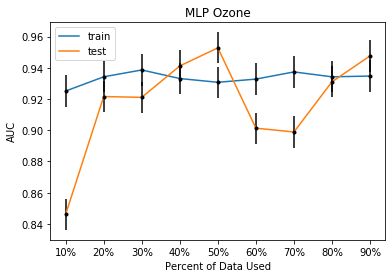

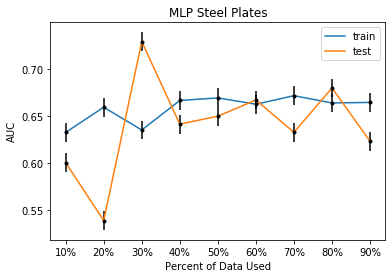

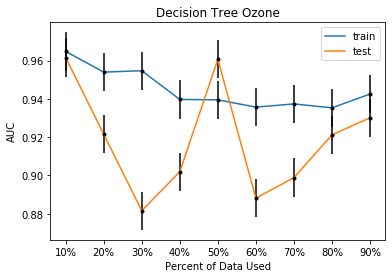

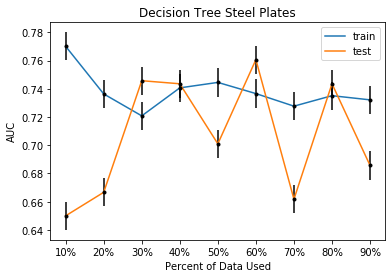

In [495]:
import matplotlib.pyplot as plt

#plot graphs
plt.plot(X_Axis, ozone_mlp_train, label="train")
plt.plot(X_Axis, ozone_mlp_test, label="test")
plt.legend()
plt.xlabel('Percent of Data Used')
plt.title('MLP Ozone')
plt.ylabel('AUC')
plt.errorbar(X_Axis, ozone_mlp_train, yerr=.01, fmt='.k')
plt.errorbar(X_Axis, ozone_mlp_test, yerr=.01, fmt='.k')
plt.show()


plt.plot(X_Axis, steelplates_mlp_train, label="train")
plt.plot(X_Axis, steelplates_mlp_test, label="test")
plt.legend()
plt.xlabel('Percent of Data Used')
plt.title('MLP Steel Plates')
plt.ylabel('AUC')
plt.errorbar(X_Axis, steelplates_mlp_train, yerr=.01, fmt='.k')
plt.errorbar(X_Axis, steelplates_mlp_test, yerr=.01, fmt='.k')
plt.show()


plt.plot(X_Axis, ozone_tree_train, label="train")
plt.plot(X_Axis, ozone_tree_test, label="test")
plt.legend()
plt.xlabel('Percent of Data Used')
plt.title('Decision Tree Ozone')
plt.ylabel('AUC')
plt.errorbar(X_Axis, ozone_tree_train, yerr=.01, fmt='.k')
plt.errorbar(X_Axis, ozone_tree_test, yerr=.01, fmt='.k')
plt.show()


plt.plot(X_Axis, steelplates_tree_train, label="train")
plt.plot(X_Axis, steelplates_tree_test, label="test")
plt.legend()
plt.xlabel('Percent of Data Used')
plt.title('Decision Tree Steel Plates')
plt.ylabel('AUC')
plt.errorbar(X_Axis, steelplates_tree_train, yerr=.01, fmt='.k')
plt.errorbar(X_Axis, steelplates_tree_test, yerr=.01, fmt='.k')
plt.show()




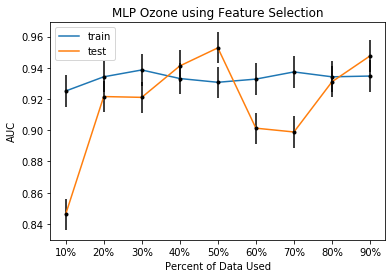

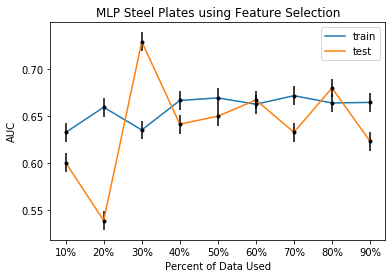

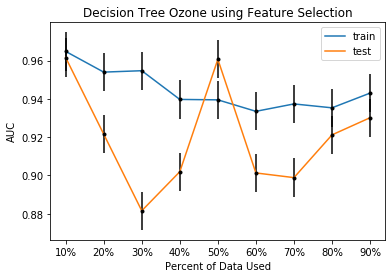

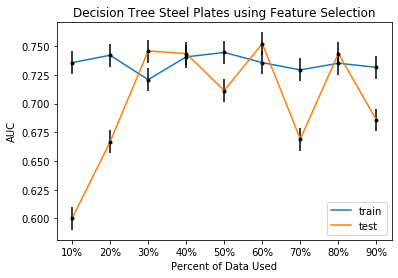

In [496]:
plt.plot(X_Axis, ozone_mlp_train_x_trees, label="train")
plt.plot(X_Axis, ozone_mlp_test_x_trees, label="test")
plt.legend()
plt.xlabel('Percent of Data Used')
plt.title('MLP Ozone using Feature Selection')
plt.ylabel('AUC')
plt.errorbar(X_Axis, ozone_mlp_train_x_trees, yerr=.01, fmt='.k')
plt.errorbar(X_Axis, ozone_mlp_test_x_trees, yerr=.01, fmt='.k')
plt.show()


plt.plot(X_Axis, steelplates_mlp_train_x_trees, label="train")
plt.plot(X_Axis, steelplates_mlp_test_x_trees, label="test")
plt.legend()
plt.xlabel('Percent of Data Used')
plt.title('MLP Steel Plates using Feature Selection')
plt.ylabel('AUC')
plt.errorbar(X_Axis, steelplates_mlp_train_x_trees, yerr=.01, fmt='.k')
plt.errorbar(X_Axis, steelplates_mlp_test_x_trees, yerr=.01, fmt='.k')
plt.show()


plt.plot(X_Axis, ozone_tree_train_x_trees, label="train")
plt.plot(X_Axis, ozone_tree_test_x_trees, label="test")
plt.legend()
plt.xlabel('Percent of Data Used')
plt.title('Decision Tree Ozone using Feature Selection')
plt.ylabel('AUC')
plt.errorbar(X_Axis, ozone_tree_train_x_trees, yerr=.01, fmt='.k')
plt.errorbar(X_Axis, ozone_tree_test_x_trees, yerr=.01, fmt='.k')
plt.show()


plt.plot(X_Axis, steelplates_tree_train_x_trees, label="train")
plt.plot(X_Axis, steelplates_tree_test_x_trees, label="test")
plt.legend()
plt.xlabel('Percent of Data Used')
plt.title('Decision Tree Steel Plates using Feature Selection')
plt.ylabel('AUC')
plt.errorbar(X_Axis, steelplates_tree_train_x_trees, yerr=.01, fmt='.k')
plt.errorbar(X_Axis, steelplates_tree_test_x_trees, yerr=.01, fmt='.k')
plt.show()


In [532]:
from scipy import stats
from sklearn import svm, datasets

# stats.gmean(steelplates['V5'])


random_state = np.random.RandomState(0)
classifier = svm.LinearSVC(random_state=random_state)
classifier.fit(X_train, y_train)



y_score = classifier.decision_function(X_test)


from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.67


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [543]:
from sklearn import svm
from sklearn import metrics

X = steelplates.iloc[:, : 28]
y = steelplates['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

clf = svm.SVC(kernel='rbf', gamma=0.7, C = 1.0).fit(X_train, y_train)
y_predicted = clf.predict(X_test)



# performance
print ("Classification report for %s" % clf)
print (metrics.classification_report(y_test, y_predicted))

print (metrics.confusion_matrix(y_test, y_predicted))

Classification report for SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.7, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
              precision    recall  f1-score   support

           1       0.68      1.00      0.81       132
           2       0.00      0.00      0.00        63

    accuracy                           0.68       195
   macro avg       0.34      0.50      0.40       195
weighted avg       0.46      0.68      0.55       195

[[132   0]
 [ 63   0]]


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [547]:
sum(steelplates_mlp_test)/9

0.6399054672310163

In [198]:
rawImage = pd.read_csv('./Image/Image_Class_Filter.csv', encoding = 'unicode_escape')

rawImage.head(7)

,a0,a1,a2,a3,a4,a5,a6,a7,a8,a9,...,a3063,a3064,a3065,a3066,a3067,a3068,a3069,a3070,a3071,class
0,170,168,177,183,181,177,181,184,189,189,...,88,85,82,83,79,78,82,78,80,1
1,159,150,153,154,138,184,154,77,61,64,...,18,16,12,13,16,14,14,17,19,1
2,164,105,118,129,134,146,166,183,199,174,...,71,48,58,64,48,41,29,26,44,2
3,17,17,17,17,19,19,20,22,22,21,...,36,25,21,21,21,21,20,18,16,2
4,197,198,201,202,203,205,205,208,210,210,...,85,93,91,96,91,70,61,63,57,2
5,73,71,77,120,125,155,147,133,112,100,...,22,55,122,87,53,46,55,38,29,2
6,202,202,204,206,208,209,210,212,213,215,...,149,174,195,212,227,237,243,243,243,0


In [199]:
image = rawImage.iloc[:, :-1]

image.head(7)

,a0,a1,a2,a3,a4,a5,a6,a7,a8,a9,...,a3062,a3063,a3064,a3065,a3066,a3067,a3068,a3069,a3070,a3071
0,170,168,177,183,181,177,181,184,189,189,...,92,88,85,82,83,79,78,82,78,80
1,159,150,153,154,138,184,154,77,61,64,...,15,18,16,12,13,16,14,14,17,19
2,164,105,118,129,134,146,166,183,199,174,...,98,71,48,58,64,48,41,29,26,44
3,17,17,17,17,19,19,20,22,22,21,...,47,36,25,21,21,21,21,20,18,16
4,197,198,201,202,203,205,205,208,210,210,...,84,85,93,91,96,91,70,61,63,57
5,73,71,77,120,125,155,147,133,112,100,...,18,22,55,122,87,53,46,55,38,29
6,202,202,204,206,208,209,210,212,213,215,...,127,149,174,195,212,227,237,243,243,243


In [10]:
from sklearn.preprocessing import OneHotEncoder
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from numpy import array


class1 = array(rawImage.iloc[[6]])

# enc = OneHotEncoder(handle_unknown='ignore')
# X = image
# enc.fit(X)
# enc.categories_

In [11]:
print(class1)

[[202 202 204 ... 243 243   0]]


In [12]:
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(class1[0])
print(integer_encoded)

[197 197 199 ... 238 238   0]


In [13]:
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


In [14]:
inverted = label_encoder.inverse_transform([argmax(onehot_encoded[0, :])])
print(inverted)

[202]


In [25]:
y = rawImage['class']

X = image

train = []

test = []

clf_mlp = MLPClassifier(activation="logistic", solver="adam", alpha=1e-5, hidden_layer_sizes=(15,10), random_state=1,max_iter=1000,learning_rate_init=.1,verbose=False)
clf_tree = DecisionTreeClassifier(criterion = 'entropy', random_state=0, max_depth=3)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8,test_size=0.2, random_state=1)
clf_mlp = clf_mlp.fit(X_train, y_train)

y_pred =  clf_mlp.predict(X_test)
train.append(accuracy_score(y_true=y_train, y_pred=clf_mlp.predict(X_train)))
test.append(accuracy_score(y_true=y_test, y_pred=y_pred))

print(train)
print(test)

[0.3309068219633943]
[0.34413965087281795]


In [34]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D
from keras.utils import np_utils

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4808, 3072)
(1203, 3072)
(4808,)
(1203,)


In [29]:

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

Shape before one-hot encoding:  (4808,)
Shape after one-hot encoding:  (4808, 10)


In [35]:
model = Sequential()
# hidden layer
model.add(Dense(100, input_shape=(3072,), activation='relu'))
# output layer
model.add(Dense(10, activation='softmax'))

In [42]:
# looking at the model summary
model.summary()
# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
# training the model for 10 epochs
model.fit(X_train, Y_train, batch_size=128, epochs=10, validation_data=(X_test, Y_test))


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 100)               307300    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1010      
Total params: 308,310
Trainable params: 308,310
Non-trainable params: 0
_________________________________________________________________
Train on 4808 samples, validate on 1203 samples
Epoch 1/10
4808/4808 [==============================] - 1s 119us/step - loss: 0.7217 - accuracy: 0.7084 - val_loss: 0.7647 - val_accuracy: 0.6924
Epoch 2/10
4808/4808 [==============================] - 0s 69us/step - loss: 0.7163 - accuracy: 0.7119 - val_loss: 0.7601 - val_accuracy: 0.6899
Epoch 3/10
4808/4808 [==============================] - 0s 69us/step - loss: 0.7134 - accuracy: 0.7113 - val_loss: 0.7613 - val_accuracy: 0.6924
Epoch 4/10
4808/4808 [====

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [65]:
yelp = open("yelp_labelled.txt","r+") 

In [67]:
yelp.read()

'Crust is not good.\t0\nNot tasty and the texture was just nasty.\t0\nStopped by during the late May bank holiday off Rick Steve recommendation and loved it.\t1\nThe selection on the menu was great and so were the prices.\t1\nNow I am getting angry and I want my damn pho.\t0\nHoneslty it didn\'t taste THAT fresh.)\t0\nThe potatoes were like rubber and you could tell they had been made up ahead of time being kept under a warmer.\t0\nThe fries were great too.\t1\nA great touch.\t1\nService was very prompt.\t1\nWould not go back.\t0\nThe cashier had no care what so ever on what I had to say it still ended up being wayyy overpriced.\t0\nI tried the Cape Cod ravoli, chicken,with cranberry...mmmm!\t1\nI was disgusted because I was pretty sure that was human hair.\t0\nI was shocked because no signs indicate cash only.\t0\nHighly recommended.\t1\nWaitress was a little slow in service.\t0\nThis place is not worth your time, let alone Vegas.\t0\ndid not like at all.\t0\nThe Burrittos Blah!\t0\nT

In [105]:
with open('yelp_labelled.txt') as f:
    mylist = list(f)
    
mylist

  

['Wow... Loved this place.\t1\n',
 'Crust is not good.\t0\n',
 'Not tasty and the texture was just nasty.\t0\n',
 'Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.\t1\n',
 'The selection on the menu was great and so were the prices.\t1\n',
 'Now I am getting angry and I want my damn pho.\t0\n',
 "Honeslty it didn't taste THAT fresh.)\t0\n",
 'The potatoes were like rubber and you could tell they had been made up ahead of time being kept under a warmer.\t0\n',
 'The fries were great too.\t1\n',
 'A great touch.\t1\n',
 'Service was very prompt.\t1\n',
 'Would not go back.\t0\n',
 'The cashier had no care what so ever on what I had to say it still ended up being wayyy overpriced.\t0\n',
 'I tried the Cape Cod ravoli, chicken,with cranberry...mmmm!\t1\n',
 'I was disgusted because I was pretty sure that was human hair.\t0\n',
 'I was shocked because no signs indicate cash only.\t0\n',
 'Highly recommended.\t1\n',
 'Waitress was a little slow in servi

In [187]:
# with open('yelp_labelled.txt') as f:
#     mylist = [line.rstrip('\t1\n') for line in f]
    
    
# woof=list(myList[0])
    
    

    

# mylist

mylist = mylist.split(' ')

AttributeError: 'list' object has no attribute 'split'

In [107]:
fname = open("yelp_labelled.txt")      # better to open files in a `with` statement
lst = list()                   # lst = [] is more Pythonic
for line in fname:
    line = line.rstrip()       # not required, `split()` will do this anyway
    words = line.split(' ')    # don't specify a delimiter, `line.split()` will split on all white space
    for word in words:
        if word in lst: continue
        lst = lst + words      # this is the reason that you end up with duplicates... words is the list of all words for this line!
    lst.sort()                 # don't sort in the for loop, just once afterwards.
print (lst)

['!\t0', '!\t1', '!!!\t1', '!....THE', '"Are', '"Gold', '"LEGIT"', '"crumby"', '"eel', '"hello,', '"mains,"', '"real', '"spicy', '"to', '"ya\'all".\t0', '"you', '"yum', '$11.99', '$12,', '$17', '$20,', '$3', '$35', '$4.00.\t0', '$7.85', '&', '&', '&', '&', '&', '&', '&', '&', '&', '&', '&', '(;\t1', '(Baseball', '(I', '(It', '(The', '(although', '(amazing).\t1', '(and', '(choux)', '(coconut', '(even', "(it's", '(just', '(me)', '(picture', '(teeth', '(which', '*', '*heart*', ',', ',', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '--', '-Drinks', '-My', '.\t1', '.\t1', '...', '/hand', '1', '1', '1', '1)', '1.5lb', '1/2', '10', '10', '10', '10', '10+', '100', '100%', '12.\t0', '15', '1979', '2', '2', '2', '2', '2', '2', '2', '2,', '20', '20', '20', '2007', '23', '3', '3', '3', '3/4ths', '30', '30', '30', '30', '30', '30s', '35', '4', '4', '4', '40', '40', '40', '40', '40min', '45', '5', '5', '5', '5', '5', '5', '5', '5', '6', '7'

In [108]:
numOfWords = dict.fromkeys(lst, 0)

In [119]:
def woof():
    for word in numOfWords:
        numOfWords[word] += 1
    return numOfWords

print (numOfWords)

{'!\t0': 3, '!\t1': 3, '!!!\t1': 3, '!....THE': 3, '"Are': 3, '"Gold': 3, '"LEGIT"': 3, '"crumby"': 3, '"eel': 3, '"hello,': 3, '"mains,"': 3, '"real': 3, '"spicy': 3, '"to': 3, '"ya\'all".\t0': 3, '"you': 3, '"yum': 3, '$11.99': 3, '$12,': 3, '$17': 3, '$20,': 3, '$3': 3, '$35': 3, '$4.00.\t0': 3, '$7.85': 3, '&': 3, '(;\t1': 3, '(Baseball': 3, '(I': 3, '(It': 3, '(The': 3, '(although': 3, '(amazing).\t1': 3, '(and': 3, '(choux)': 3, '(coconut': 3, '(even': 3, "(it's": 3, '(just': 3, '(me)': 3, '(picture': 3, '(teeth': 3, '(which': 3, '*': 3, '*heart*': 3, ',': 3, '-': 3, '--': 3, '-Drinks': 3, '-My': 3, '.\t1': 3, '...': 3, '/hand': 3, '1': 3, '1)': 3, '1.5lb': 3, '1/2': 3, '10': 3, '10+': 3, '100': 3, '100%': 3, '12.\t0': 3, '15': 3, '1979': 3, '2': 3, '2,': 3, '20': 3, '2007': 3, '23': 3, '3': 3, '3/4ths': 3, '30': 3, '30s': 3, '35': 3, '4': 3, '40': 3, '40min': 3, '45': 3, '5': 3, '6': 3, '7': 3, '70+': 3, '8': 3, '8,': 3, '90%': 3, ':': 3, ':(\t0': 3, ':)': 3, 'A': 3, 'AGAIN!\t0'

In [185]:
for word in lst:
    numOfWords[word] += 1


In [186]:
numOfWords

{'!\t0': 7,
 '!\t1': 7,
 '!!!\t1': 7,
 '!....THE': 7,
 '"Are': 7,
 '"Gold': 7,
 '"LEGIT"': 7,
 '"crumby"': 7,
 '"eel': 7,
 '"hello,': 7,
 '"mains,"': 7,
 '"real': 7,
 '"spicy': 7,
 '"to': 7,
 '"ya\'all".\t0': 7,
 '"you': 7,
 '"yum': 7,
 '$11.99': 7,
 '$12,': 7,
 '$17': 7,
 '$20,': 7,
 '$3': 7,
 '$35': 7,
 '$4.00.\t0': 7,
 '$7.85': 7,
 '&': 47,
 '(;\t1': 7,
 '(Baseball': 7,
 '(I': 7,
 '(It': 7,
 '(The': 7,
 '(although': 7,
 '(amazing).\t1': 7,
 '(and': 7,
 '(choux)': 7,
 '(coconut': 7,
 '(even': 7,
 "(it's": 7,
 '(just': 7,
 '(me)': 7,
 '(picture': 7,
 '(teeth': 7,
 '(which': 7,
 '*': 7,
 '*heart*': 7,
 ',': 11,
 '-': 87,
 '--': 7,
 '-Drinks': 7,
 '-My': 7,
 '.\t1': 11,
 '...': 7,
 '/hand': 7,
 '1': 15,
 '1)': 7,
 '1.5lb': 7,
 '1/2': 7,
 '10': 19,
 '10+': 7,
 '100': 7,
 '100%': 7,
 '12.\t0': 7,
 '15': 7,
 '1979': 7,
 '2': 31,
 '2,': 7,
 '20': 15,
 '2007': 7,
 '23': 7,
 '3': 15,
 '3/4ths': 7,
 '30': 23,
 '30s': 7,
 '35': 7,
 '4': 15,
 '40': 19,
 '40min': 7,
 '45': 7,
 '5': 35,
 '6': 7,
 

In [146]:
import gensim 
from gensim.models import Word2Vec 
from sklearn.decomposition import PCA
from matplotlib import pyplot

In [179]:
change = Word2Vec(lst, size=300, min_count=1)

In [180]:
embed = model_1[change.wv.vocab]
pca = PCA(n_components=5)
result = pca.fit_transform(embed)

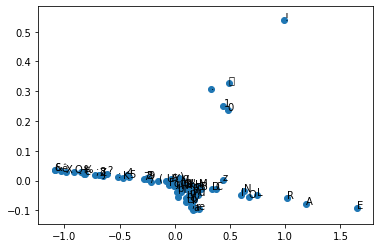

In [182]:
pyplot.scatter(result[:, 0], result[:, 1])
describe = list(change.wv.vocab)
for i, letters in enumerate(describe):
    pyplot.annotate(letters, xy=(result[i, 0], result[i, 1]))
pyplot.show()

In [197]:
txt = pd.DataFrame(lst)

txt

,0
0,!\t0
1,!\t1
2,!!!\t1
3,!....THE
4,"""Are"
...,...
10211,yummy
10212,yummy.\t1
10213,zero
10214,zero


In [194]:
y = rawImage['class']

X = txt

train = []

test = []

clf_mlp = MLPClassifier(activation="logistic", solver="adam", alpha=1e-5, hidden_layer_sizes=(15,10), random_state=1,max_iter=1000,learning_rate_init=.1,verbose=False)
clf_tree = DecisionTreeClassifier(criterion = 'entropy', random_state=0, max_depth=3)

X_train, X_test, = train_test_split(X, train_size=0.8,test_size=0.2, random_state=1)
clf_mlp = clf_mlp.fit(X_train, y_train)

y_pred =  clf_mlp.predict(X_test)
train.append(accuracy_score(y_pred=clf_mlp.predict(X_train)))
test.append(accuracy_score(y_pred=y_pred))

print(train)
print(test)

ValueError: could not convert string to float: 'potatoes...'